El objetivo es calcular los coeficientes A+ y A- en base a los valores de las distintas frecuencias involucradas y del detuning debido al laser. Defino una función para calcular G y otra que calcula A+ y A- en base a G

$$G(\nu,\omega,\lambda)=\frac{-\chi^2 \alpha^2}{\lambda + i\nu_0} + i\epsilon C $$,

en particular me interesa conocer el valor de G con y sin la corrección.

$$C=\frac{(\lambda+i\nu_0)^2 - \omega^2}{((\lambda+i\nu_0)^2 + \omega^2)^2} $$

Programo una función G y una función G más la corrección. $\chi$ y $\alpha$ se definen como constantes globales. Se trabaja con $\frac{\delta}{\nu_0} = a$ como la variable, haciendo la sustitución se llega a que la corrección es


$$C=\frac{(-k+i\nu_0(a+1))^2 - \omega^2}{((-k+i\nu_0(a+1))^2 + \omega^2)^2} $$

y se toma un rango de $a \in [-2,2]$ para los calculos. Todos los parámetros se definen en terminos de $\nu_0$




In [22]:
nu0=1000
m=round(Int,sqrt(.5*nu0))
chi = 1
alpha =1
k = .5*nu0 #kappa es el decaimiento de la cavidad
w = nu0/m;
ep=(m^2)/5 #El valor de epsilon

function Aminus(a,epsilon)
    k*chi*alpha/(k^2+nu0^2*(a+1)^2)+real(im*epsilon*((-k+im*nu0*(a+1))^2-4*w^2)/((-k+im*nu0*(a+1))^2+4*w^2)^2)
end

function Aplus(a,epsilon)
    k*chi*alpha/(k^2+nu0^2*(a-1)^2)+real(im*epsilon*((-k+im*nu0*(a-1))^2-4*w^2)/((-k+im*nu0*(a-1))^2+4*w^2)^2)
end
n=6
mesh =2^n
y=Vector(undef,2^(n+2)+1)
ye=Vector(undef,2^(n+2)+1)
x=Vector(undef,2^(n+2)+1)
temp=Vector(undef,2^(n+2)+1)
tempe=Vector(undef,2^(n+2)+1)
i=1
plotvariable=zeros(6,2^(n+2)+1)
asdf=[]

for j=0:1:5
    for a=-2:1/mesh:2
        temp[i]=Aplus(a,0)/(Aminus(a,0)-Aplus(a,0))
        tempe[i]=Aplus(a,ep*j)/(Aminus(a,ep*j)-Aplus(a,ep*j))  
        x[i]=a
        plotvariable[j+1,i]=tempe[i]
        i+=1
    end
    push!(asdf,plotvariable[j+1,:])
    i=1
end

println(nu0/w)
println(w)
println(ep)



22.0
45.45454545454545
96.8


In [25]:
a=plot(x,asdf,
    title=L"Temperature",
    xaxis=L"\delta/\nu_0",xlims=(-2,-.9),
    yaxis="Average Phonon Number",ylims=(0,.2), 
    linestyle= :auto,linewidth=3,
    legend=:top,
    label=[L"\epsilon=0",L"\epsilon=\nu_0/10",L"\epsilon=2\nu_0/10",L"\epsilon=3\nu_0/10",L"\epsilon=4\nu_0/10",L"\epsilon=5\nu_0/10"])

savefig("GraficaTemp.pdf")


In [1]:
using LaTeXStrings
using Plots

In [20]:
asdf

6-element Array{Any,1}:
 [0.15625, 0.153574, 0.150918, 0.148281, 0.145665, 0.14307, 0.140497, 0.137946, 0.135417, 0.132911  …  -1.13291, -1.13542, -1.13795, -1.1405, -1.14307, -1.14567, -1.14828, -1.15092, -1.15357, -1.15625]       
 [0.141683, 0.139129, 0.136596, 0.134086, 0.131599, 0.129135, 0.126696, 0.124281, 0.121892, 0.11953  …  -1.15241, -1.15507, -1.15774, -1.16043, -1.16313, -1.16586, -1.1686, -1.17135, -1.17413, -1.17691]      
 [0.130862, 0.12842, 0.126002, 0.123607, 0.121237, 0.118893, 0.116574, 0.114281, 0.112015, 0.109777  …  -1.18347, -1.18622, -1.18897, -1.19174, -1.19451, -1.19729, -1.20008, -1.20288, -1.20569, -1.20851]     
 [0.122506, 0.120165, 0.117847, 0.115555, 0.113288, 0.111047, 0.108832, 0.106645, 0.104485, 0.102354  …  -1.24069, -1.24315, -1.24561, -1.24807, -1.25053, -1.25298, -1.25544, -1.25791, -1.26038, -1.26286]    
 [0.115859, 0.113606, 0.111377, 0.109173, 0.106996, 0.104844, 0.10272, 0.100623, 0.0985547, 0.096515  …  -1.38117, -1.38049, -1.37988, -1.37

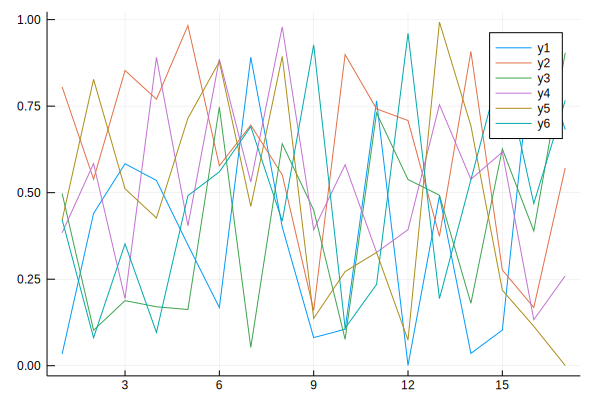

In [164]:
plot(plotvariable)

In [173]:
RAND = rand(5,10)

5×10 Array{Float64,2}:
 0.246445   0.649697   0.609904  0.257914  …  0.706558  0.122665   0.716971 
 0.843134   0.686266   0.749568  0.40201      0.440493  0.0992014  0.72913  
 0.843795   0.0330203  0.368714  0.156112     0.868201  0.4057     0.0776203
 0.0637781  0.676759   0.484756  0.957422     0.711101  0.457091   0.935928 
 0.787975   0.645031   0.466904  0.302374     0.739999  0.465048   0.921212 

In [175]:
aux=[]
for j=1:5
    push!(aux,RAND[j,:])
end
aux   

5-element Array{Any,1}:
 [0.246445, 0.649697, 0.609904, 0.257914, 0.32328, 0.997698, 0.921301, 0.706558, 0.122665, 0.716971]  
 [0.843134, 0.686266, 0.749568, 0.40201, 0.0181411, 0.733307, 0.0904283, 0.440493, 0.0992014, 0.72913]
 [0.843795, 0.0330203, 0.368714, 0.156112, 0.441265, 0.260331, 0.248475, 0.868201, 0.4057, 0.0776203] 
 [0.0637781, 0.676759, 0.484756, 0.957422, 0.398253, 0.230179, 0.602358, 0.711101, 0.457091, 0.935928]
 [0.787975, 0.645031, 0.466904, 0.302374, 0.396545, 0.256006, 0.273628, 0.739999, 0.465048, 0.921212] 

In [47]:
y

2×257 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0